# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 24 14:33:01 2018

@author: maryneagin
"""


# Load libraries
#from IPython import get_ipython
#def __reset__(): get_ipython().magic('reset -sf')

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt


from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


The second step is to import data from the given file.

In [8]:
# load input data
df = pd.DataFrame.from_csv('1challenge.csv')

One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [9]:
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]

# classified data
df_data=df[0:10000]
array = df_data.values
X = array[:,0:2]
Y = array[:,2]

# unclassified data
df_test1=df[10000:15000]
array = df_test1.values
X_test = array[:,0:2]
Y_test = array[:,2]

It may be helpful to visualize the data.

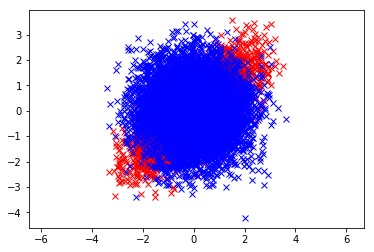

In [10]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()

In [11]:
#After creating an algorithm and generating labels, one should update the original CSV file.
# Split the classified data into train data (80%) and validation data (20%)
validation_size = 0.2
seed = 17
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

    
# Make predictions using SVC on validation dataset (Since SVC performs better than all algorithms)
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))  


# Make predictions on validation dataset
predictions = svm.predict(X_test)
print('predictions',predictions)
predictions_ans=np.array(predictions)
predictions_ans=predictions_ans.reshape(predictions_ans.shape[0],1)
TestData=np.append(TestData,predictions_ans,axis=1)
dfdata=pd.DataFrame(TestData,columns=['Y0', 'Y1','label'])
df = pd.concat([df0, df1, dfdata], join='outer', ignore_index=True)
df.to_csv('1challenge.csv')


LR: 0.599375 (0.009719)
LDA: 0.599375 (0.009719)
KNN: 0.602125 (0.020774)
CART: 0.575375 (0.015442)
NB: 0.599500 (0.009846)
SVM: 0.642000 (0.012288)
0.6495
             precision    recall  f1-score   support

        0.0       0.65      0.92      0.76      1205
        1.0       0.66      0.24      0.36       795

avg / total       0.65      0.65      0.60      2000

predictions [ 0.  0.  0. ...,  0.  0.  0.]


In [12]:
#df = pd.concat([df0, df1, dftest], join='outer', ignore_index=True)
#df.to_csv("1challenge.csv")